In [1]:
#Reading csv files folder 
folder <- "D:\\R programming\\dutch-energy (1)\\"      
file_list <- list.files(path=folder, pattern="*.csv") 
for (i in 1:length(file_list))
{
  assign(file_list[i], read.csv(paste(folder, file_list[i], sep='')))
  print(file_list[i])
}
folder


[1] "stedin_gas_2009.csv"
[1] "stedin_gas_2010.csv"
[1] "stedin_gas_2011.csv"
[1] "stedin_gas_2012.csv"
[1] "stedin_gas_2013.csv"
[1] "stedin_gas_2014.csv"
[1] "stedin_gas_2015.csv"
[1] "stedin_gas_2016.csv"
[1] "stedin_gas_2017.csv"
[1] "stedin_gas_2018.csv"


[1] "D:\\R programming\\dutch-energy (1)\\"

In [2]:
stedin<-rbind(stedin_gas_2009.csv,stedin_gas_2010.csv,stedin_gas_2011.csv,
              stedin_gas_2012.csv,stedin_gas_2013.csv,stedin_gas_2014.csv,stedin_gas_2015.csv,
              stedin_gas_2016.csv,stedin_gas_2017.csv,stedin_gas_2018.csv)#row binding
dim(stedin)#checking no of columns and rows
names(stedin)#checking names

[1] 851437     14

[1] "net_manager"                  "purchase_area"               
 [3] "street"                       "zipcode_from"                
 [5] "zipcode_to"                   "city"                        
 [7] "num_connections"              "delivery_perc"               
 [9] "perc_of_active_connections"   "type_conn_perc"              
[11] "type_of_connection"           "annual_consume"              
[13] "annual_consume_lowtarif_perc" "smartmeter_perc"

In [3]:
sum(is.na(stedin))#checking  null values

[1] 0

In [4]:
#filtering required columns
library(dplyr)
filtered_stedin<-data.frame(stedin$purchase_area,stedin$street,stedin$type_of_connection,stedin$city,stedin$annual_consume,stedin$num_connections)
dim(filtered_stedin)
names(filtered_stedin)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 851437      6

[1] "stedin.purchase_area"      "stedin.street"            
[3] "stedin.type_of_connection" "stedin.city"              
[5] "stedin.annual_consume"     "stedin.num_connections"

In [5]:
#changing names
library(dplyr)#library for selecting,mutating,filtering
final_stedin<-select(filtered_stedin,#editing names
                     purchasearea=stedin.purchase_area,
                     street=stedin.street,
                     typeofconnection=stedin.type_of_connection,
                     city=stedin.city,
                     annualconsume=stedin.annual_consume,
                     noofconnections=stedin.num_connections)
names(final_stedin)

[1] "purchasearea"     "street"           "typeofconnection" "city"            
[5] "annualconsume"    "noofconnections"

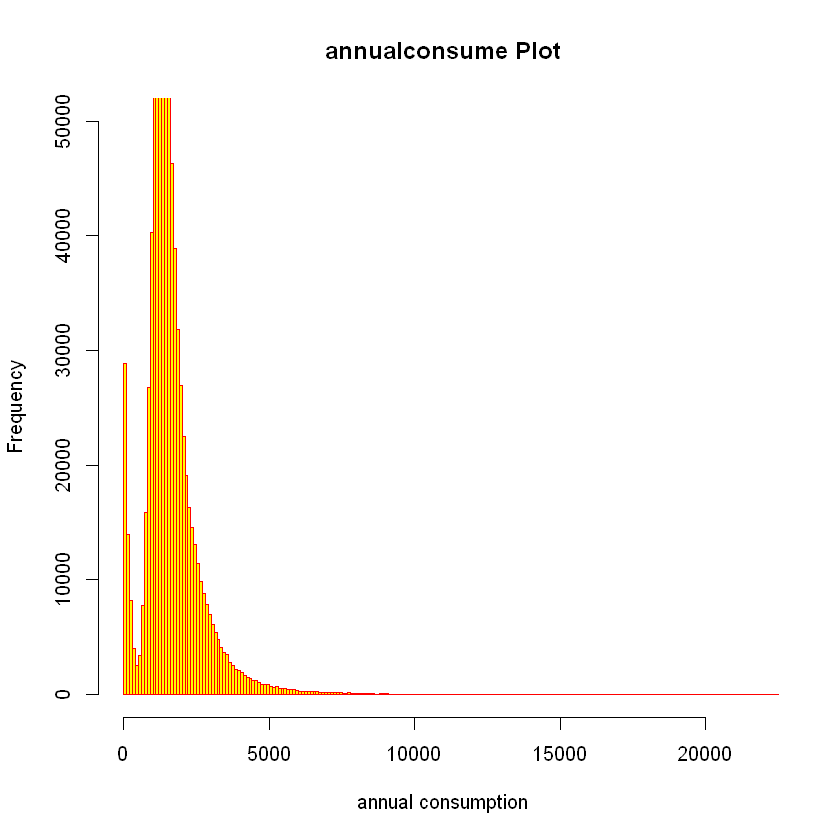

In [6]:
#univariate analysis
hist (final_stedin$annualconsume,#histogram
      main = "annualconsume Plot",#heading
      xlab = "annual consumption",#label
      col = "yellow",
      border = "red", 
      xlim = c(0,22000),#xlimit
      ylim = c(0,50000),#ylimit
      breaks = 300)#width

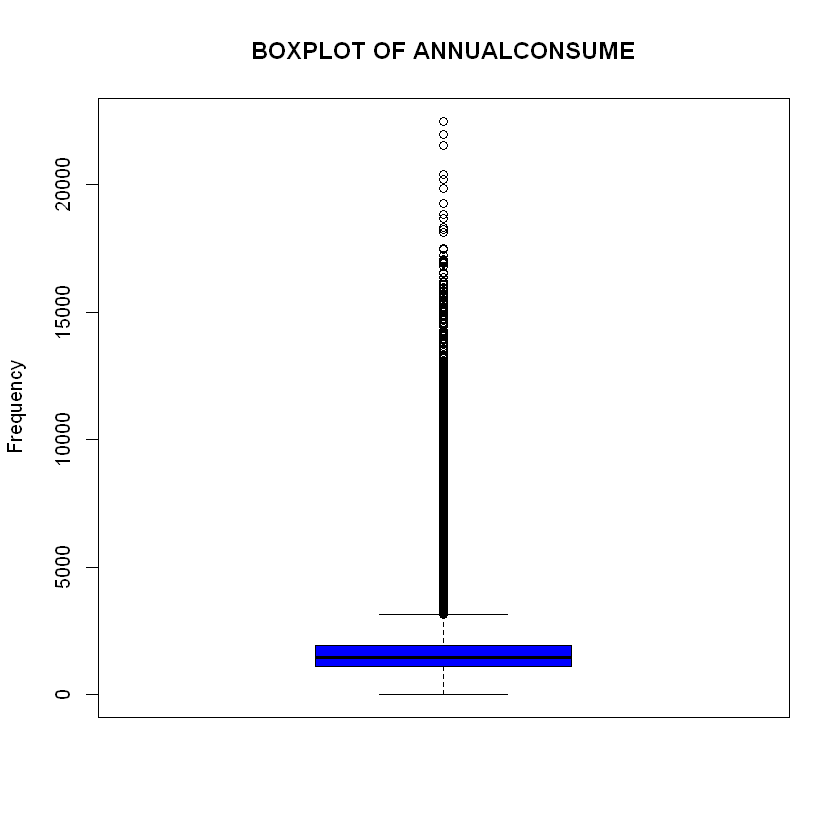

In [7]:
#boxplot
boxplot(final_stedin$annualconsume,
        main = toupper("Boxplot of annualconsume"),
        ylab = "Frequency",
        col = "blue")

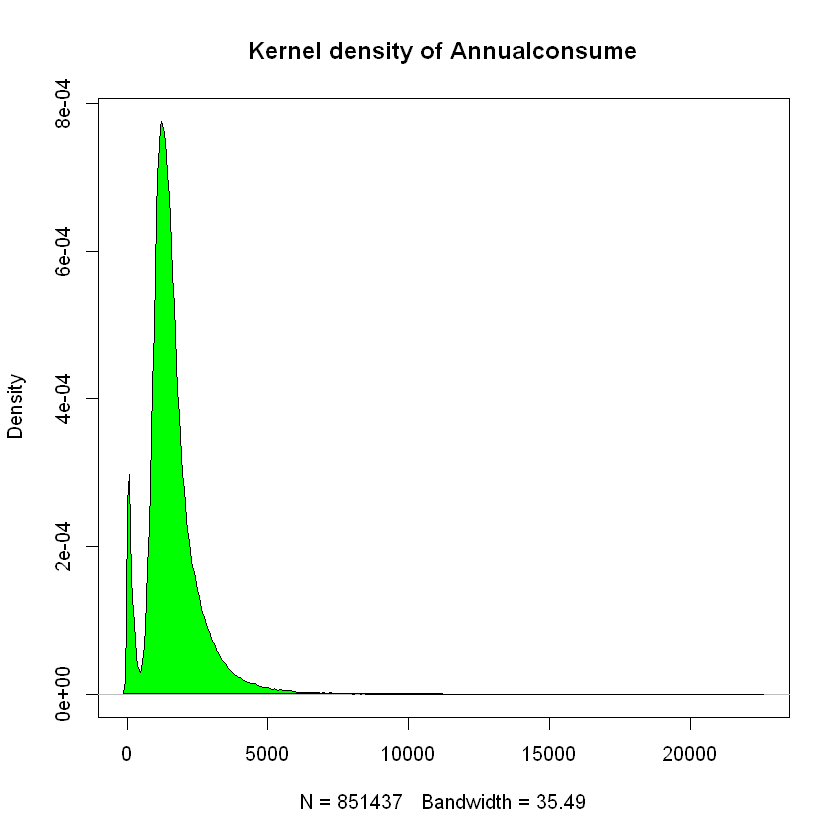

In [8]:
#kernel density plot
d <- density(final_stedin$annualconsume)
plot(d, main = "Kernel density of Annualconsume")
polygon(d, col = "green", border = "black")

In [9]:
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(final_stedin), 0.8*nrow(final_stedin))  # row indices for training data
trainingDataPow <- final_stedin[trainingRowIndex, ]  # model training data
testDataPow  <- final_stedin[-trainingRowIndex, ]   # test data
dim(trainingDataPow)
dim(testDataPow)

[1] 681149      6

[1] 170288      6

In [10]:
#bivariate analysis
anov<-aov(final_stedin$annualconsume ~ final_stedin$typeofconnection ,data=final_stedin)#oneway


In [11]:
summary(anov)

                                  Df    Sum Sq   Mean Sq F value Pr(>F)    
final_stedin$typeofconnection      5 1.384e+11 2.768e+10   31799 <2e-16 ***
Residuals                     851431 7.411e+11 8.704e+05                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [12]:
#chi-Squre test
chisq.test(final_stedin$annualconsume, final_stedin$typeofconnection, correct=FALSE)
chisq.test(final_stedin$annualconsume, final_stedin$city, correct=FALSE)

Warning message in chisq.test(final_stedin$annualconsume, final_stedin$typeofconnection, :
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  final_stedin$annualconsume and final_stedin$typeofconnection
X-squared = 2243900, df = 42450, p-value < 2.2e-16


Warning message in chisq.test(final_stedin$annualconsume, final_stedin$city, correct = FALSE):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  final_stedin$annualconsume and final_stedin$city
X-squared = 10223000, df = 3404500, p-value < 2.2e-16


In [13]:
library(car)
leveneTest(annualconsume ~ typeofconnection, data = final_stedin)#for homogeneous test



Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



Df     F value  Pr(>F)
group      5 5393.257  0    
      851431       NA NA

In [14]:
#correlation
consvstnofconn<-cor(final_stedin$annualconsume,final_stedin$noofconnections )#poor relation,linear regression is not required
consvstnofconn

[1] -0.0841591

In [15]:
#get no of categories
factorA <- factor(final_stedin$Category)
lev <- levels(factorA)
lev
table(final_stedin$Category)

character(0)

< table of extent 0 >

In [16]:
summary(final_stedin$annualconsume)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1109    1439    1629    1920   22498 

In [17]:
#categorising annualconsume,accoding to mean value
final_stedin$Category <- ifelse(final_stedin$annualconsume >=1629, 1, 0)
names(final_stedin)
head(final_stedin)

[1] "purchasearea"     "street"           "typeofconnection" "city"            
[5] "annualconsume"    "noofconnections"  "Category"

purchasearea street          typeofconnection city         annualconsume
1 Duivendrecht Tom Schreursweg G4               AMSTERDAM    2611         
2 Halfweg      Tom Schreursweg G4               AMSTERDAM    2993         
3 Duivendrecht Molenkade       G4               DUIVENDRECHT 5400         
4 Duivendrecht Industrieweg    G4               DUIVENDRECHT 5393         
5 Duivendrecht Rijksstraatweg  G4               DUIVENDRECHT 2128         
6 Duivendrecht Rijksstraatweg  G4               DUIVENDRECHT 2502         
  noofconnections Category
1 26              1       
2 26              1       
3 20              1       
4 22              1       
5 11              1       
6 19              1

In [18]:
library(sqldf)#getting count of categories using sql code
sqldf("select Category,count(*) from final_stedin group by Category")

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


Category count(*)
1 0        529597  
2 1        321840

In [19]:
#splitting training data and test data
set.seed(100)
trainingindex<-sample(1:nrow(final_stedin),0.7*nrow(final_stedin))
traininggas<-final_stedin[trainingindex,]#training data
testgas<-final_stedin[-trainingindex,]#test data

In [20]:
dim(traininggas)
dim(testgas)

[1] 596005      7

[1] 255432      7

In [25]:
logitMod <- glm(Category ~ annualconsume + noofconnections, 
                data=traininggas, 
                family=binomial(link="logit"))

predicted <- predict(logitMod, testgas, type="response")  # predicted scores
head(predicted)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

5           17           18           20           26           28 
1.000000e+00 1.000000e+00 2.220446e-16 1.000000e+00 1.000000e+00 1.000000e+00

In [26]:
table(testgas$Category, predicted > 0.8)

   
     FALSE   TRUE
  0 158832      0
  1      0  96600

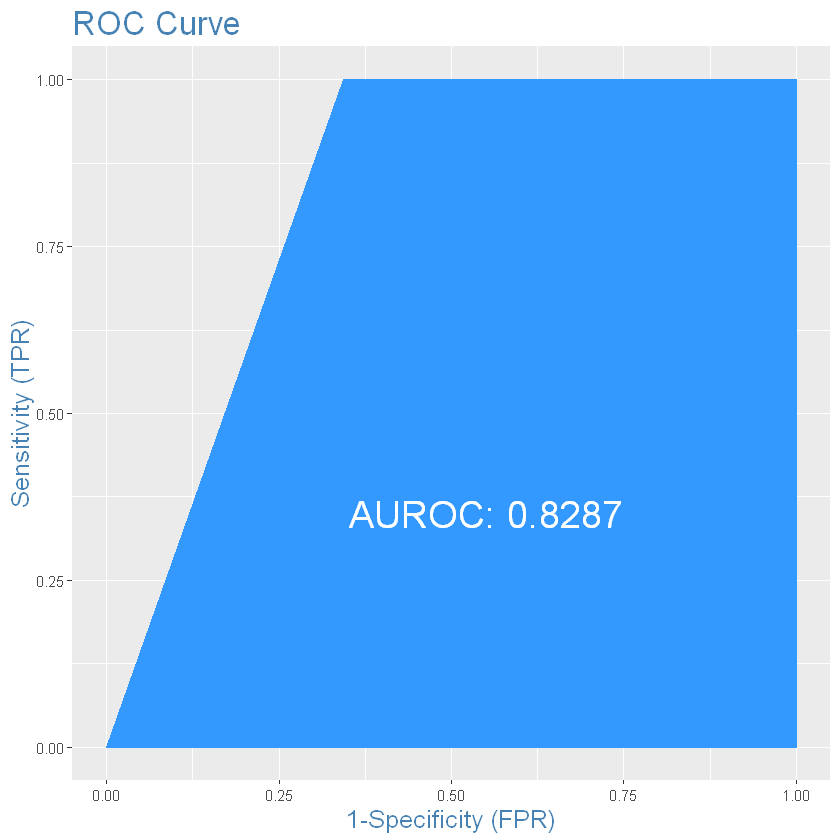

In [29]:
library(InformationValue)
plotROC(testgas , predicted) #visualising prediction accuracy

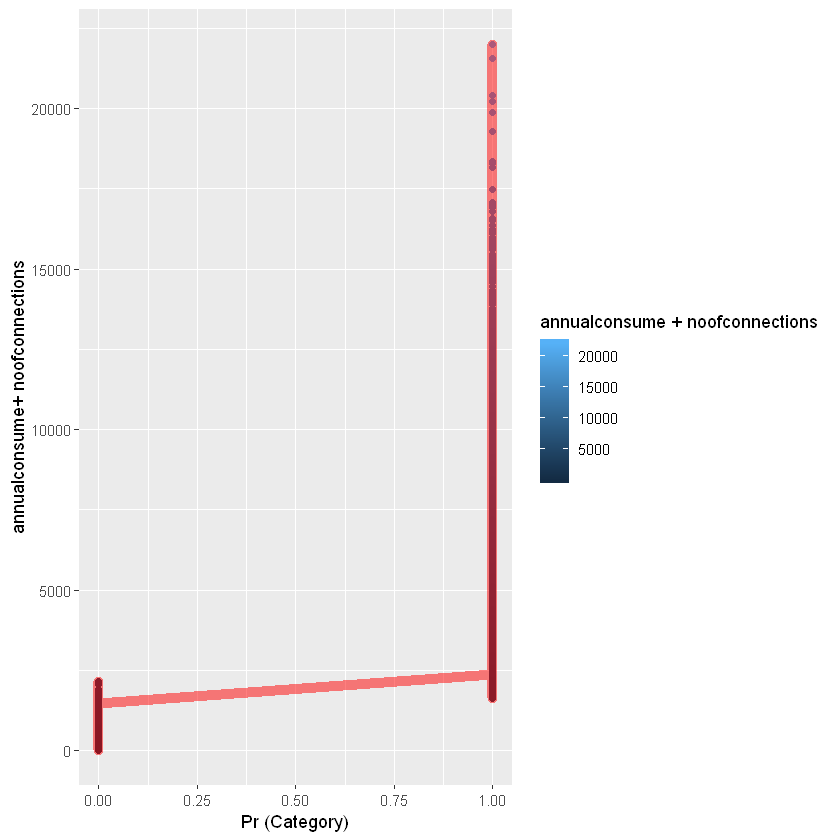

In [31]:
library("ggplot2")
ggplot <- ggplot(traininggas, aes(Category, as.numeric(annualconsume + noofconnections),
                                   color=annualconsume+ noofconnections)) +
  geom_point(position=position_jitter(height=0.03, width=0)) +
  geom_line( color='red', size=3, alpha=0.5)+
  xlab("Pr (Category)") + ylab("annualconsume+ noofconnections")

print(ggplot)

In [32]:
svmdata <- final_stedin
names(svmdata)
library(sqldf)

[1] "purchasearea"     "street"           "typeofconnection" "city"            
[5] "annualconsume"    "noofconnections"  "Category"

In [43]:
svmdata <- mutate(svmdata, typeofconnection = ifelse(typeofconnection == "3x25" ,0 ,#changing type of connection to numericaldata in order to perform svm
                                                   ifelse(typeofconnection == "1x25",1 ,
                                                          ifelse(typeofconnection == "1x50",2 ,
                                                                 ifelse(typeofconnection == "3x35",3 ,
                                                                        ifelse(typeofconnection == "1x35",4, 
                                                                               ifelse(typeofconnection == "OBK",5,
                                                                                      ifelse(typeofconnection == "3x80",6,
                                                                                             ifelse(typeofconnection== "3x63", 7,
                                                                                                    ifelse(typeofconnection == "3x50",8,
                                                                                                           ifelse(typeofconnection == "1x6",9,10
                                                                                                           )))))))))))

In [44]:
head(svmdata)

purchasearea street          typeofconnection city         annualconsume
1 Duivendrecht Tom Schreursweg 10               AMSTERDAM    2611         
2 Halfweg      Tom Schreursweg 10               AMSTERDAM    2993         
3 Duivendrecht Molenkade       10               DUIVENDRECHT 5400         
4 Duivendrecht Industrieweg    10               DUIVENDRECHT 5393         
5 Duivendrecht Rijksstraatweg  10               DUIVENDRECHT 2128         
6 Duivendrecht Rijksstraatweg  10               DUIVENDRECHT 2502         
  noofconnections Category
1 26              1       
2 26              1       
3 20              1       
4 22              1       
5 11              1       
6 19              1

In [46]:
library(e1071)

In [59]:
fit <-svm(typeofconnection ~ ., data=svmdata, type='C-classification', kernel='linear')#cannot perform svm due to low efficiency of my ram

ERROR: Error: cannot allocate vector of size 6.0 Gb


In [ ]:
svm_pred <- predict(fit,svmdata)#Followed by svm model

table(svm_pred)

plot(fit, svmdata,typeofconnection~annualconsume,symbolPalette = rainbow(1),col = c("white","red","green","blue","orange"))
